In [22]:
# 方程式を定義
# グローバル変数に、a,bが必要
import numpy as np
import math
import functools
from scipy import integrate

def func_r(q, b):
    value = q / (1 - b + b * q) / (1 - b + b * q)
    return value

def func_f_integrand(z, m, q, a, b):
    return math.exp(-z**2/2) * np.tanh(b * (m + math.sqrt(a * func_r(q, b)) * z))

def func_f(m, q, a, b):
    func  = functools.partial(func_f_integrand, m=m, q=q, a=a, b=b)
#     print(integrate.quad(func, -100.0, 100.0)[1])
    return m - (1 / math.sqrt(2 * np.pi)) * integrate.quad(func, -10.0, 10.0)[0]


def func_g_integrand(z, m, q, a, b):
    return math.exp(-z**2/2) * np.tanh(b * (m + math.sqrt(a * func_r(q, b)) * z)) ** 2

def func_g(m, q, a, b):
    func  = functools.partial(func_g_integrand, m=m, q=q, a=a, b=b)
#     print(integrate.quad(func, -100.0, 100.0)[1])
    return q - (1 / math.sqrt(2 * np.pi)) * integrate.quad(func, -10.0, 10.0)[0]


def plot_f_and_g(plot_num, zlim, args, a, b):
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection='3d', zlim=(-1.0, 1.0))
    ax.set_title("f(m,q) & g(m,q)", size = 20)

    ax.set_xlabel("m", size = 20)
    ax.set_ylabel("q", size = 20)
    ax.set_zlabel("", size = 20)

    x = np.linspace(args["m_min"], args["m_max"], plot_num)
    y = np.linspace(args["q_min"], args["q_max"], plot_num)

    X, Y = np.meshgrid(x, y)
    X = X.flatten()
    Y = Y.flatten()
    
    F = np.ndarray([])
    G = np.ndarray([])
    for i in range(len(Y)-1):
        F = np.append(F, func_f(X[i], Y[i], a, b))
        G = np.append(G, func_g(X[i], Y[i], a, b))

    ax.scatter(X, Y, F, color = "red", label='f (m,q)')
    ax.scatter(X, Y, G, color = "green", label='g (m,q)')

    # これ呼ばないとラベルでない
    plt.legend()
    plt.show()
    

def a(z):
    return math.exp(-z**2/2)

result = integrate.quad(a, -10.0, 10.0)[0] / math.sqrt(2*3.14)
print(result)

1.0002535751093533


NameError: name 'ニュートン法の更新式を定義' is not defined

In [37]:
import numpy as np
import csv

# 解を見つけるためのクラス
class Solver:
    
    def __init__(self, a_mesh_num, T_mesh_num, mq_mesh_num, delta, func_1, func_2, debug):
        self.a_mesh_num = a_mesh_num
        self.T_mesh_num = T_mesh_num
        self.mq_mesh_num = mq_mesh_num
        self.delta = delta
        self.func_1 = func_1
        self.func_2 = func_2
        self.debug = debug
        
    def set_args(self, args):
        self.a_min = args["a_min"]
        self.a_max = args["a_max"]
        self.T_min = args["T_min"]
        self.T_max = args["T_max"]
        self.m_min = args["m_min"]
        self.m_max = args["m_max"]
        self.q_min = args["q_min"]
        self.q_max = args["q_max"]
        
        
    def solve(self):
        A = np.linspace(self.a_min, self.a_max, self.a_mesh_num)
        T = np.linspace(self.T_min, self.T_max, self.T_mesh_num)
        a_arr, t_arr = np.meshgrid(A, T)
        self.a_arr = a_arr.flatten()
        self.T_arr = t_arr.flatten()
        
        M = np.linspace(self.m_min, self.m_max, self.mq_mesh_num)
        Q = np.linspace(self.q_min, self.q_max, self.mq_mesh_num)
        m, q = np.meshgrid(M, Q)
        m = m.flatten()
        q = q.flatten()
        
        answer_m = []
        answer_q = []
        for i in range(len(self.a_arr)):
            m_i = []
            q_i = []

            a = self.a_arr[i]
            # βに変換しておく
            b = 1/self.T_arr[i]

            # ③,④
            for j in range(len(m)):
                if m[j] < 0.05 and q[j] < 0.05:
                    continue
                
                f = self.func_1(m[j], q[j], a, b)
                g = self.func_2(m[j], q[j], a, b)
#                 print("{0},{1},{2},{3},{4},{5}".format(a, self.T_arr[i], m[j], q[j], f, g))
                if abs(f) < self.delta and abs(g) < self.delta:
                        m_i.append(m[j])
                        q_i.append(q[j])
                
            answer_m_i = 0
            answer_q_i = 0
            for j in range(len(m_i)):
                if m_i[j] < 0:
                    continue
                answer_m_i = m_i[j]
                answer_q_i = q_i[j]
                
            if self.debug:
                print("a={0}, T={1}  =>  m={2}, q={3}".format(self.a_arr[i], self.T_arr[i], answer_m_i, answer_q_i))
            if self.debug:
                print("↓mの候補↓")
                print(m_i)
                print("↓qの候補↓")
                print(q_i)
                print("\n\n")

            answer_m.append(answer_m_i)
            answer_q.append(answer_q_i)
            
        self.m_answer_arr = answer_m
        self.q_answer_arr = answer_q
        
        
    def to_csv(self, filename):
        f = open(filename, "w")
        writer = csv.writer(f)
        for i in range(len(self.a_arr)):
            tmp = [
                self.a_arr[i], 
                self.T_arr[i], 
                self.m_answer_arr[i], 
                self.q_answer_arr[i],
            ]
            writer.writerow(tmp)
        f.close()

In [6]:
# solver = Solver(30, 30, 50, pow(10, -2), func_f, func_g, 1)

# solve_args = {
#     "a_min": 0,
#     "a_max": 0.3,
#     "T_min": 0.31,
#     "T_max": 1.31,
#     "m_min": -1,
#     "m_max": 1,
#     "q_min": 0,
#     "q_max": 1,
# }

# solver.set_args(solve_args)
# solver.solve()
# solver.to_csv("result0207.csv")

a=0.0, T=0.31  =>  m=1.0, q=1.0
↓mの候補↓
[-1.0, 1.0]
↓qの候補↓
[1.0, 1.0]



a=0.010344827586206896, T=0.31  =>  m=1.0, q=1.0
↓mの候補↓
[-1.0, 1.0]
↓qの候補↓
[1.0, 1.0]



a=0.020689655172413793, T=0.31  =>  m=1.0, q=1.0
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145, -0.061224489795918435, -0.020408163265306145, 0.020408163265306145, 0.06122448979591821, -1.0, 1.0]
↓qの候補↓
[0.6326530612244897, 0.6326530612244897, 0.7346938775510203, 0.7346938775510203, 0.7346938775510203, 0.7346938775510203, 1.0, 1.0]



a=0.03103448275862069, T=0.31  =>  m=1.0, q=0.9795918367346939
↓mの候補↓
[-1.0, 1.0]
↓qの候補↓
[0.9795918367346939, 0.9795918367346939]



a=0.041379310344827586, T=0.31  =>  m=1.0, q=0.9795918367346939
↓mの候補↓
[-0.6326530612244898, 0.6326530612244896, -1.0, 1.0]
↓qの候補↓
[0.7755102040816326, 0.7755102040816326, 0.9795918367346939, 0.9795918367346939]



a=0.05172413793103448, T=0.31  =>  m=0.020408163265306145, q=0.7551020408163265
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145, -0.020408163265

a=0.23793103448275862, T=0.34448275862068967  =>  m=0.020408163265306145, q=0.7755102040816326
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.7755102040816326, 0.7755102040816326]



a=0.2482758620689655, T=0.34448275862068967  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.25862068965517243, T=0.34448275862068967  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.2689655172413793, T=0.34448275862068967  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.2793103448275862, T=0.34448275862068967  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.2896551724137931, T=0.34448275862068967  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.3, T=0.34448275862068967  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.0, T=0.3789655172413793  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.010344827586206896, T=0.3789655172413793  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.020689655172413793, T=0.3789655172413793  =>  m=0.5918367346938773, q=0.6938775510204082
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145, -0.061224489795918435, -0.0204081632

a=0.11379310344827587, T=0.41344827586206895  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.12413793103448276, T=0.41344827586206895  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.13448275862068965, T=0.41344827586206895  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.14482758620689656, T=0.41344827586206895  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.15517241379310345, T=0.41344827586206895  =>  m=0.020408163265306145, q=0.7142857142857142
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.7142857142857142, 0.7142857142857142]



a=0.16551724137931034, T=0.41344827586206895  =>  m=0.020408163265306145, q=0.7142857142857142
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.7142857142857142, 0.7142857142857142]



a=0.17586206896551723, T=0.41344827586206895  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.18620689655172412, T=0.41344827586206895  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.19655172413793104, T=0.41344827586206895  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.20689655172413793, T=0.4

C:\Users\yamot\AppData\Local\Temp\ipykernel_24616\1628771984.py:40: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return q - (1 / math.sqrt(2 * np.pi)) * integrate.quad(func, -100.0, 100.0)[0]


a=0.25862068965517243, T=0.4479310344827586  =>  m=0.020408163265306145, q=0.7142857142857142
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.7142857142857142, 0.7142857142857142]



a=0.2689655172413793, T=0.4479310344827586  =>  m=0.020408163265306145, q=0.7142857142857142
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.7142857142857142, 0.7142857142857142]



a=0.2793103448275862, T=0.4479310344827586  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.2896551724137931, T=0.4479310344827586  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.3, T=0.4479310344827586  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.0, T=0.4824137931034483  =>  m=0.9591836734693877, q=0.9183673469387754
↓mの候補↓
[-0.9591836734693877, 0.9591836734693877]
↓qの候補↓
[0.9183673469387754, 0.9183673469387754]



a=0.010344827586206896, T=0.4824137931034483  =>  m=0.9591836734693877, q=0.9183673469387754
↓mの候補↓
[-0.9591836734693877, 0.9591836734693877]
↓qの候補↓
[0.9183673469387754, 0.9183673469387754]



a=0.0206896

a=0.07241379310344828, T=0.516896551724138  =>  m=0.020408163265306145, q=0.2857142857142857
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.2857142857142857, 0.2857142857142857]



a=0.08275862068965517, T=0.516896551724138  =>  m=0.020408163265306145, q=0.26530612244897955
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.26530612244897955, 0.26530612244897955]



a=0.09310344827586206, T=0.516896551724138  =>  m=0.020408163265306145, q=0.6122448979591836
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.24489795918367346, 0.24489795918367346, 0.6122448979591836, 0.6122448979591836]



a=0.10344827586206896, T=0.516896551724138  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.11379310344827587, T=0.516896551724138  =>  m=0.020408163265306145, q=0.22448979591836732
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.22448979591836732, 0.22448979591836732]



a=0.12413793103448276, T=0.516896551724

a=0.0, T=0.5858620689655172  =>  m=0.9183673469387754, q=0.836734693877551
↓mの候補↓
[-0.9183673469387755, 0.9183673469387754]
↓qの候補↓
[0.836734693877551, 0.836734693877551]



a=0.010344827586206896, T=0.5858620689655172  =>  m=0.9183673469387754, q=0.836734693877551
↓mの候補↓
[-0.061224489795918435, -0.020408163265306145, 0.020408163265306145, 0.06122448979591821, -0.020408163265306145, 0.020408163265306145, -0.4693877551020409, 0.46938775510204067, -0.9183673469387755, 0.9183673469387754]
↓qの候補↓
[0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.4693877551020408, 0.4693877551020408, 0.4897959183673469, 0.4897959183673469, 0.836734693877551, 0.836734693877551]



a=0.020689655172413793, T=0.5858620689655172  =>  m=0.8775510204081631, q=0.7959183673469387
↓mの候補↓
[-0.061224489795918435, -0.020408163265306145, 0.020408163265306145, 0.06122448979591821, -0.5510204081632654, 0.5510204081632653, -0.8775510204081632, 0.8775510204081631]
↓qの候補↓
[0.4897959183673469, 0

a=0.08275862068965517, T=0.6203448275862069  =>  m=0.020408163265306145, q=0.12244897959183673
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.12244897959183673, 0.12244897959183673]



a=0.09310344827586206, T=0.6203448275862069  =>  m=0.020408163265306145, q=0.5306122448979591
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145, -0.020408163265306145, 0.020408163265306145, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.1020408163265306, 0.1020408163265306, 0.12244897959183673, 0.12244897959183673, 0.5306122448979591, 0.5306122448979591]



a=0.10344827586206896, T=0.6203448275862069  =>  m=0.020408163265306145, q=0.1020408163265306
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.08163265306122448, 0.08163265306122448, 0.1020408163265306, 0.1020408163265306]



a=0.11379310344827587, T=0.6203448275862069  =>  m=0.020408163265306145, q=0.08163265306122448
↓mの候補↓
[-0.020408163265306145, 0.0204081632653061

a=0.22758620689655173, T=0.6548275862068966  =>  m=0.020408163265306145, q=0.5714285714285714
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.5714285714285714, 0.5714285714285714]



a=0.23793103448275862, T=0.6548275862068966  =>  m=0.020408163265306145, q=0.5714285714285714
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.5714285714285714, 0.5714285714285714]



a=0.2482758620689655, T=0.6548275862068966  =>  m=0.020408163265306145, q=0.5714285714285714
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.5714285714285714, 0.5714285714285714]



a=0.25862068965517243, T=0.6548275862068966  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.2689655172413793, T=0.6548275862068966  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.2793103448275862, T=0.6548275862068966  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.2896551724137931, T=0.6548275862068966  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.3, T=0.6548275862068966  =>  m=0.020408163265306145, q=0.5918367346938775
↓mの候補↓
[

a=0.10344827586206896, T=0.7237931034482759  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.11379310344827587, T=0.7237931034482759  =>  m=0.020408163265306145, q=0.4693877551020408
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.4693877551020408, 0.4693877551020408]



a=0.12413793103448276, T=0.7237931034482759  =>  m=0.020408163265306145, q=0.4693877551020408
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.4693877551020408, 0.4693877551020408]



a=0.13448275862068965, T=0.7237931034482759  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.14482758620689656, T=0.7237931034482759  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.15517241379310345, T=0.7237931034482759  =>  m=0.020408163265306145, q=0.4897959183673469
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.4897959183673469, 0.4897959183673469]



a=0.16551724137931034, T=0.7237931034482759  =>  m=0.020408163265306145, q=0.4897959183673469
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.489795

a=0.03103448275862069, T=0.7927586206896551  =>  m=0.06122448979591821, q=0.32653061224489793
↓mの候補↓
[-0.061224489795918435, -0.020408163265306145, 0.020408163265306145, 0.06122448979591821]
↓qの候補↓
[0.32653061224489793, 0.32653061224489793, 0.32653061224489793, 0.32653061224489793]



a=0.041379310344827586, T=0.7927586206896551  =>  m=0.020408163265306145, q=0.3469387755102041
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.3469387755102041, 0.3469387755102041]



a=0.05172413793103448, T=0.7927586206896551  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.06206896551724138, T=0.7927586206896551  =>  m=0.020408163265306145, q=0.36734693877551017
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.36734693877551017, 0.36734693877551017]



a=0.07241379310344828, T=0.7927586206896551  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.08275862068965517, T=0.7927586206896551  =>  m=0.020408163265306145, q=0.3877551020408163
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補

a=0.010344827586206896, T=0.8617241379310345  =>  m=0.06122448979591821, q=0.04081632653061224
↓mの候補↓
[0.06122448979591821, 0.06122448979591821, 0.06122448979591821]
↓qの候補↓
[0.0, 0.02040816326530612, 0.04081632653061224]



a=0.020689655172413793, T=0.8617241379310345  =>  m=0.06122448979591821, q=0.0
↓mの候補↓
[0.06122448979591821]
↓qの候補↓
[0.0]



a=0.03103448275862069, T=0.8617241379310345  =>  m=0.06122448979591821, q=0.0
↓mの候補↓
[0.06122448979591821]
↓qの候補↓
[0.0]



a=0.041379310344827586, T=0.8617241379310345  =>  m=0.020408163265306145, q=0.2857142857142857
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.2857142857142857, 0.2857142857142857]



a=0.05172413793103448, T=0.8617241379310345  =>  m=0.06122448979591821, q=0.0
↓mの候補↓
[0.06122448979591821]
↓qの候補↓
[0.0]



a=0.06206896551724138, T=0.8617241379310345  =>  m=0.06122448979591821, q=0.0
↓mの候補↓
[0.06122448979591821]
↓qの候補↓
[0.0]



a=0.07241379310344828, T=0.8617241379310345  =>  m=0.02040

a=0.20689655172413793, T=0.896206896551724  =>  m=0.020408163265306145, q=0.3877551020408163
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.3877551020408163, 0.3877551020408163]



a=0.21724137931034482, T=0.896206896551724  =>  m=0.06122448979591821, q=0.0
↓mの候補↓
[0.06122448979591821]
↓qの候補↓
[0.0]



a=0.22758620689655173, T=0.896206896551724  =>  m=0.06122448979591821, q=0.0
↓mの候補↓
[0.06122448979591821]
↓qの候補↓
[0.0]



a=0.23793103448275862, T=0.896206896551724  =>  m=0.020408163265306145, q=0.4081632653061224
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.4081632653061224, 0.4081632653061224]



a=0.2482758620689655, T=0.896206896551724  =>  m=0.020408163265306145, q=0.4081632653061224
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.4081632653061224, 0.4081632653061224]



a=0.25862068965517243, T=0.896206896551724  =>  m=0.06122448979591821, q=0.0
↓mの候補↓
[0.0

a=0.020689655172413793, T=0.9651724137931035  =>  m=0.06122448979591821, q=0.0
↓mの候補↓
[0.06122448979591821]
↓qの候補↓
[0.0]



a=0.03103448275862069, T=0.9651724137931035  =>  m=0.06122448979591821, q=0.18367346938775508
↓mの候補↓
[0.06122448979591821, -0.061224489795918435, -0.020408163265306145, 0.020408163265306145, 0.06122448979591821]
↓qの候補↓
[0.0, 0.18367346938775508, 0.18367346938775508, 0.18367346938775508, 0.18367346938775508]



a=0.041379310344827586, T=0.9651724137931035  =>  m=0.020408163265306145, q=0.2040816326530612
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.2040816326530612, 0.2040816326530612]



a=0.05172413793103448, T=0.9651724137931035  =>  m=0.06122448979591821, q=0.0
↓mの候補↓
[0.06122448979591821]
↓qの候補↓
[0.0]



a=0.06206896551724138, T=0.9651724137931035  =>  m=0.020408163265306145, q=0.22448979591836732
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.22448979591836732, 0.22448979591

a=0.15517241379310345, T=0.9996551724137932  =>  m=0.020408163265306145, q=0.2857142857142857
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.2857142857142857, 0.2857142857142857]



a=0.16551724137931034, T=0.9996551724137932  =>  m=0.06122448979591821, q=0.0
↓mの候補↓
[0.06122448979591821]
↓qの候補↓
[0.0]



a=0.17586206896551723, T=0.9996551724137932  =>  m=0.020408163265306145, q=0.3061224489795918
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.3061224489795918, 0.3061224489795918]



a=0.18620689655172412, T=0.9996551724137932  =>  m=0.020408163265306145, q=0.3061224489795918
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.3061224489795918, 0.3061224489795918]



a=0.19655172413793104, T=0.9996551724137932  =>  m=0.020408163265306145, q=0.3061224489795918
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.3061224489795918, 0.30

a=0.22758620689655173, T=1.0341379310344827  =>  m=0.020408163265306145, q=0.3061224489795918
↓mの候補↓
[0.06122448979591821, 0.1020408163265305, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.0, 0.3061224489795918, 0.3061224489795918]



a=0.23793103448275862, T=1.0341379310344827  =>  m=0.020408163265306145, q=0.3061224489795918
↓mの候補↓
[0.06122448979591821, 0.1020408163265305, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.0, 0.3061224489795918, 0.3061224489795918]



a=0.2482758620689655, T=1.0341379310344827  =>  m=0.1020408163265305, q=0.0
↓mの候補↓
[0.06122448979591821, 0.1020408163265305]
↓qの候補↓
[0.0, 0.0]



a=0.25862068965517243, T=1.0341379310344827  =>  m=0.020408163265306145, q=0.32653061224489793
↓mの候補↓
[0.06122448979591821, 0.1020408163265305, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.0, 0.32653061224489793, 0.32653061224489793]



a=0.2689655172413793, T=1.0341379310344827  =>  m=0.020408163265306145, q=0.32653061224489793
↓mの候補↓
[0.

a=0.0, T=1.1031034482758622  =>  m=0.1020408163265305, q=0.0
↓mの候補↓
[0.06122448979591821, 0.1020408163265305]
↓qの候補↓
[0.0, 0.0]



a=0.010344827586206896, T=1.1031034482758622  =>  m=0.06122448979591821, q=0.02040816326530612
↓mの候補↓
[0.06122448979591821, 0.1020408163265305, 0.06122448979591821]
↓qの候補↓
[0.0, 0.0, 0.02040816326530612]



a=0.020689655172413793, T=1.1031034482758622  =>  m=0.06122448979591821, q=0.04081632653061224
↓mの候補↓
[0.06122448979591821, 0.1020408163265305, 0.06122448979591821, 0.06122448979591821]
↓qの候補↓
[0.0, 0.0, 0.02040816326530612, 0.04081632653061224]



a=0.03103448275862069, T=1.1031034482758622  =>  m=0.06122448979591821, q=0.061224489795918366
↓mの候補↓
[0.06122448979591821, 0.1020408163265305, -0.061224489795918435, -0.020408163265306145, 0.020408163265306145, 0.06122448979591821]
↓qの候補↓
[0.0, 0.0, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366]



a=0.041379310344827586, T=1.1031034482758622  =>  m=0.02040816326530614

a=0.07241379310344828, T=1.1375862068965517  =>  m=0.020408163265306145, q=0.1020408163265306
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.1020408163265306, 0.1020408163265306]



a=0.08275862068965517, T=1.1375862068965517  =>  m=0.020408163265306145, q=0.12244897959183673
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.12244897959183673, 0.12244897959183673]



a=0.09310344827586206, T=1.1375862068965517  =>  m=0.020408163265306145, q=0.12244897959183673
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.12244897959183673, 0.12244897959183673]



a=0.10344827586206896, T=1.1375862068965517  =>  m=0.020408163265306145, q=0.14285714285714285
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.14285714285714285, 0.14285714285714285]



a=0.11379310344827587, T=1.1375862068965517  =>  m=0.020408163265306145, q=0.14285714285714285


a=0.16551724137931034, T=1.1720689655172414  =>  m=0.020408163265306145, q=0.16326530612244897
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.16326530612244897, 0.16326530612244897]



a=0.17586206896551723, T=1.1720689655172414  =>  m=0.020408163265306145, q=0.18367346938775508
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.18367346938775508, 0.18367346938775508]



a=0.18620689655172412, T=1.1720689655172414  =>  m=0.020408163265306145, q=0.18367346938775508
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.18367346938775508, 0.18367346938775508]



a=0.19655172413793104, T=1.1720689655172414  =>  m=0.020408163265306145, q=0.18367346938775508
↓mの候補↓
[0.06122448979591821, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.0, 0.18367346938775508, 0.18367346938775508]



a=0.20689655172413793, T=1.1720689655172414  =>  m=0.020408163265306145, q=0.204081632653061

a=0.3, T=1.206551724137931  =>  m=0.020408163265306145, q=0.22448979591836732
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.22448979591836732, 0.22448979591836732]



a=0.0, T=1.2410344827586206  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.010344827586206896, T=1.2410344827586206  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.020689655172413793, T=1.2410344827586206  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.03103448275862069, T=1.2410344827586206  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.041379310344827586, T=1.2410344827586206  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.05172413793103448, T=1.2410344827586206  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.06206896551724138, T=1.2410344827586206  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.07241379310344828, T=1.2410344827586206  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.08275862068965517, T=1.2410344827586206  =>  m=0, q=0
↓mの候補↓
[]
↓qの候補↓
[]



a=0.09310344827586206, T=1.2410344827586206  =>  m=0.020408163265306145, q=0.061224489795918366
↓mの候

a=0.19655172413793104, T=1.2755172413793103  =>  m=0.020408163265306145, q=0.12244897959183673
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.1020408163265306, 0.1020408163265306, 0.12244897959183673, 0.12244897959183673]



a=0.20689655172413793, T=1.2755172413793103  =>  m=0.020408163265306145, q=0.12244897959183673
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.12244897959183673, 0.12244897959183673]



a=0.21724137931034482, T=1.2755172413793103  =>  m=0.020408163265306145, q=0.14285714285714285
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145, -0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.12244897959183673, 0.12244897959183673, 0.14285714285714285, 0.14285714285714285]



a=0.22758620689655173, T=1.2755172413793103  =>  m=0.020408163265306145, q=0.14285714285714285
↓mの候補↓
[-0.020408163265306145, 0.020408163265306145]
↓qの候補↓
[0.14285714285714285, 0.14285714285714285]



a=0.23793103448275862, T

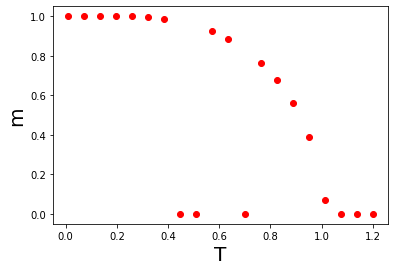

In [52]:
# α=0で検証
def func_f_2(m, q, a, b):
    return m - np.tanh(b * m)

def func_g_2(m, q, a, b):
    return q - np.tanh(b * m) ** 2


solver = Solver(1, 20, 500, pow(10, -3), func_f_2, func_g_2, 0)
solve_args = {
    "a_min": 0.0,
    "a_max": 0.0,
    "T_min": 0.01,
    "T_max": 1.2,
    "m_min": -1,
    "m_max": 1,
    "q_min": 0,
    "q_max": 1,
}

solver.set_args(solve_args)
solver.solve()
solver.to_csv("a_0_strict.csv")


result_arr = np.loadtxt("./a_0_strict.csv", delimiter=",")

result_a = result_arr[:, 0]
result_t = result_arr[:, 1]
result_m = result_arr[:, 2]
result_q = result_arr[:, 3]

fig = plt.figure()
ax_3 = fig.add_subplot(111)

ax_3.set_xlabel("T", size = 20)
ax_3.set_ylabel("m", size = 20)

ax_3.scatter(result_t, result_m, color="red")

plt.show()

# solver = Solver(1, 5, 50, pow(10, -4), func_f, func_g, 0)
# solver.set_args(solve_args)
# solver.solve()
# solver.to_csv("result2.csv")

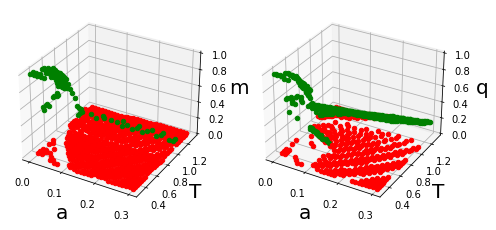

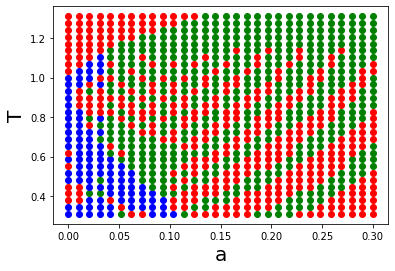

In [13]:
def plot_scatter(_ax, result_a_1, result_t_1, result_z_1, debug=False):
    for i in range(len(result_a_1)):
        if debug:
            print(result_a_1[i], result_t_1[i], result_z_1[i])
        _ax.scatter(result_a_1[i], result_t_1[i], result_z_1[i], color = "red" if result_z_1[i]<0.1 else "green")


# csv 読み出し
import matplotlib.pyplot as plt
result_arr = np.loadtxt("./result0207.csv", delimiter=",")

result_a = result_arr[:, 0]
result_t = result_arr[:, 1]
result_m = result_arr[:, 2]
result_q = result_arr[:, 3]

# プロット
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(121, projection='3d', zlim=(0, 1.0))

ax.set_xlabel("a", size = 20)
ax.set_ylabel("T", size = 20)
ax.set_zlabel("m", size = 20)

plot_scatter(ax, result_a, result_t, result_m)

# csv 読み出し
ax_2 = fig.add_subplot(122, projection='3d', zlim=(0, 1.0))

ax_2.set_xlabel("a", size = 20)
ax_2.set_ylabel("T", size = 20)
ax_2.set_zlabel("q", size = 20)

plot_scatter(ax_2, result_a, result_t, result_q)



fig = plt.figure()
ax_3 = fig.add_subplot(111)

ax_3.set_xlabel("a", size = 20)
ax_3.set_ylabel("T", size = 20)

for i in range(len(result_a)):
    color = "red" 
    if result_m[i] > 0.05 and result_q[i] > 0.05:
        color = "blue"
    elif result_q[i] > 0.05:
        color = "green"
    ax_3.scatter(result_a[i], result_t[i], color=color)


plt.show()

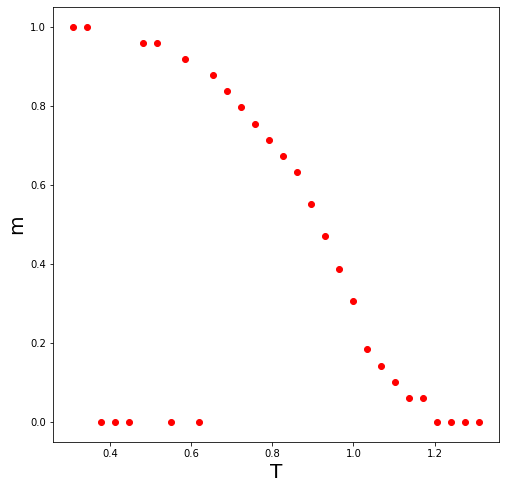

In [9]:
#  α=0のときの T vs mのグラフ

import matplotlib.pyplot as plt
import numpy as np
result_arr = np.loadtxt("./result0207.csv", delimiter=",")

result_a = result_arr[:, 0]
result_t = result_arr[:, 1]
result_m = result_arr[:, 2]

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)

ax.set_xlabel("T", size = 20)
ax.set_ylabel("m", size = 20)

for i in range(len(result_m)):
    if result_a[i] == 0.0:
        ax.scatter(result_t[i], result_m[i], color = "red")

=======ここから常磁性層==========
a=0.01, T=2.0


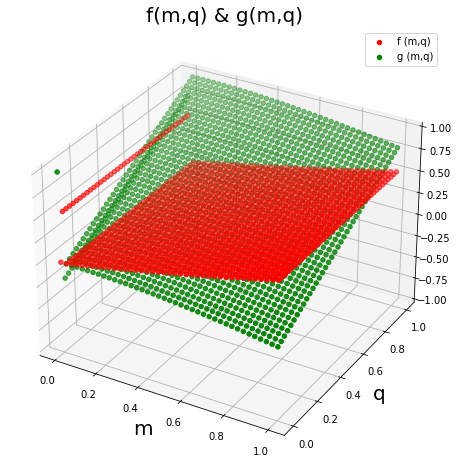

a=0.01, T=10.0


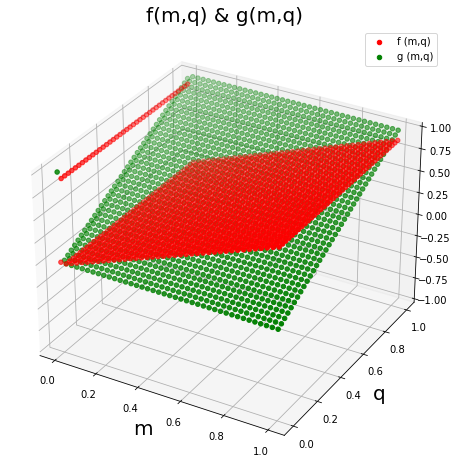

a=0.3, T=2.0


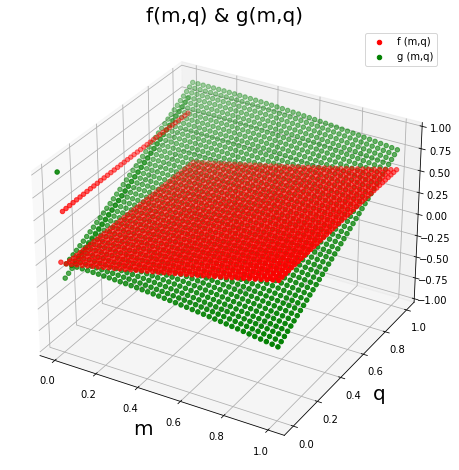

a=0.3, T=10.0


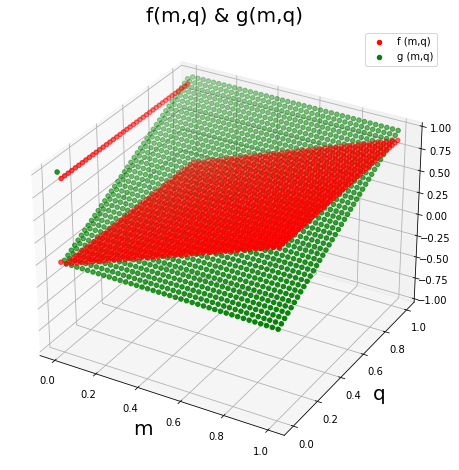

=======ここまで常磁性層==========


=======ここから想起層==========
a=0.01, T=0.5


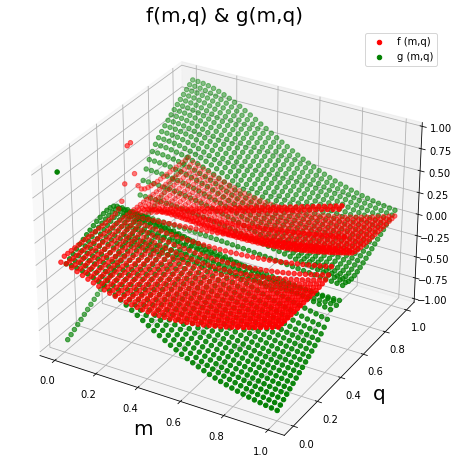

a=0.1, T=0.01


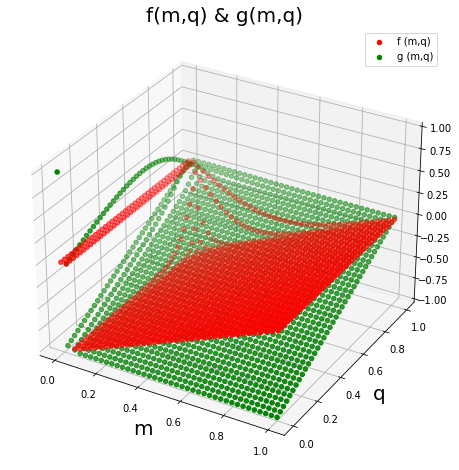

=======ここまで想起層==========


=======ここからスピングラス層==========
a=0.1, T=1.0


C:\Users\yamot\AppData\Local\Temp\ipykernel_27452\4283626895.py:21: RuntimeWarning: invalid value encountered in double_scalars
  value = q / (1 - b + b * q) ** 2
C:\Users\yamot\AppData\Local\Temp\ipykernel_27452\4283626895.py:30: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return m - (1 / math.sqrt(2 * np.pi)) * integrate.quad(func, -100.0, 100.0)[0]
C:\Users\yamot\AppData\Local\Temp\ipykernel_27452\4283626895.py:38: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return q - (1 / math.sqrt(2 * np.pi)) * integrate.quad(func, -100.0, 100.0)[0]


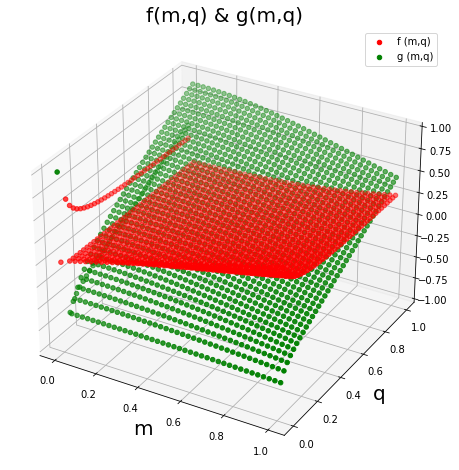

a=0.5, T=0.01


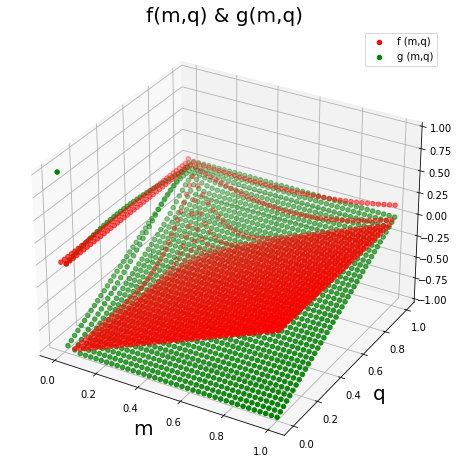

a=0.1, T=0.01


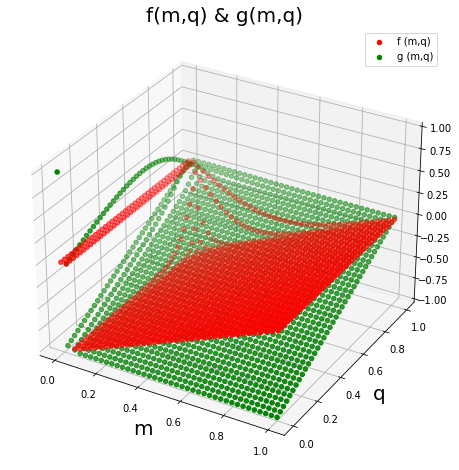

=======ここまでスピングラス層==========




In [222]:
# 常磁性層
print("=======ここから常磁性層==========")
a = 0.01
b = 0.5    # T = 2

args = {
    "m_min": 0,
    "m_max": 1,
    "q_min": 0,
    "q_max": 1,
}
print("a={0}, T={1}".format(a, 1/b))
plot_f_and_g(plot_num=40, zlim=(-1.0, 1.0), a=a ,b=b, args=args)


a = 0.01
b = 0.1    # T = 10

args = {
    "m_min": 0,
    "m_max": 1,
    "q_min": 0,
    "q_max": 1,
}
print("a={0}, T={1}".format(a, 1/b))
plot_f_and_g(plot_num=40, zlim=(-1.0, 1.0), a=0.01 ,b=0.1, args=args)


a = 0.3
b = 0.5    # T = 2

args = {
    "m_min": 0,
    "m_max": 1,
    "q_min": 0,
    "q_max": 1,
}
print("a={0}, T={1}".format(a, 1/b))
plot_f_and_g(plot_num=40, zlim=(-1.0, 1.0), a=a ,b=b, args=args)


a = 0.3
b = 0.1    # T = 10

args = {
    "m_min": 0,
    "m_max": 1,
    "q_min": 0,
    "q_max": 1,
}
print("a={0}, T={1}".format(a, 1/b))
plot_f_and_g(plot_num=40, zlim=(-1.0, 1.0), a=a ,b=b, args=args)

print("=======ここまで常磁性層==========\n\n")


print("=======ここから想起層==========")

a = 0.01
b = 2    # T = 0.5

args = {
    "m_min": 0,
    "m_max": 1,
    "q_min": 0,
    "q_max": 1,
}
print("a={0}, T={1}".format(a, 1/b))
plot_f_and_g(plot_num=40, zlim=(-1.0, 1.0), a=a ,b=b, args=args)



a = 0.1
b = 100    # T = 0.01

args = {
    "m_min": 0,
    "m_max": 1,
    "q_min": 0,
    "q_max": 1,
}
print("a={0}, T={1}".format(a, 1/b))
plot_f_and_g(plot_num=40, zlim=(-1.0, 1.0), a=a ,b=b, args=args)



print("=======ここまで想起層==========\n\n")




print("=======ここからスピングラス層==========")

a = 0.1
b = 1    # T = 1

args = {
    "m_min": 0,
    "m_max": 1,
    "q_min": 0,
    "q_max": 1,
}
print("a={0}, T={1}".format(a, 1/b))
plot_f_and_g(plot_num=40, zlim=(-1.0, 1.0), a=a ,b=b, args=args)


a = 0.5
b = 100    # T = 0.01

args = {
    "m_min": 0,
    "m_max": 1,
    "q_min": 0,
    "q_max": 1,
}
print("a={0}, T={1}".format(a, 1/b))
plot_f_and_g(plot_num=40, zlim=(-1.0, 1.0), a=a ,b=b, args=args)


a = 0.1
b = 100    # T = 0.01

args = {
    "m_min": 0,
    "m_max": 1,
    "q_min": 0,
    "q_max": 1,
}
print("a={0}, T={1}".format(a, 1/b))
plot_f_and_g(plot_num=40, zlim=(-1.0, 1.0), a=a ,b=b, args=args)

print("=======ここまでスピングラス層==========\n\n")